In [ ]:
#from scipy import stats
#import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%cd  'Progetto Covid Gruppo Horror'/

%ls

In [ ]:
#importazione file fiumi
df_fiumi=pd.read_csv("fiumi_clean.csv", sep = ";")

In [ ]:
#inserimento  dello zero al posto dei nan in modo tale che si possono sommare i valori (anche quelli nulli)
df_fiumi = df_fiumi.fillna(0)

In [ ]:
df_comuni = pd.read_csv("comuni_clean.csv",sep=";")

In [ ]:
df_regioni = pd.read_csv("covid19_region_python_w_daily_deaths.csv")

In [ ]:
# sostituisco P.A. di Bolzano e P.A. Trento con Trentino Alto Adige
#df_regioni['Regione'] = df_regioni.iloc[:,2].replace('P.A. Trento', 'Trentino Alto Adige')
#df_regioni['Regione'] = df_regioni.iloc[:,2].replace('P.A. Bolzano', 'Trentino Alto Adige')


In [ ]:
df_fiumi['Regioni'] = df_fiumi.iloc[:,1].replace('Friuli-Venezia Giulia', 'Friuli Venezia Giulia')
df_fiumi['Regioni'] = df_fiumi.iloc[:,1].replace('Trentino-Alto Adige', 'Trentino Alto Adige')

In [ ]:
df_regioni.groupby('RegionName')['Daily_Deaths',"NewPositiveCases", "TotalHospitalizedPatients"].sum()

In [ ]:
df_regioni =df_regioni.groupby('RegionName')['Daily_Deaths',"NewPositiveCases", "TotalHospitalizedPatients"].sum()

<ipython-input-53-720d2fdd90d2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_regioni =df_regioni.groupby('RegionName')['Daily_Deaths',"NewPositiveCases", "TotalHospitalizedPatients"].sum()


In [ ]:
#rename della colonna regioni
df_fiumi = df_fiumi.rename(columns={'Regioni_2019': 'Regioni'})

In [ ]:
tab_unite = df_regioni.merge(df_fiumi, left_on='RegionName', right_on='Regioni')
tab_unite

In [ ]:
#tasso mortalità
tab_unite['death%'] = (tab_unite['Daily_Deaths']/df_comuni['Popolazione2011'])*100
#tasso new_positive
tab_unite['New_positive%'] = (tab_unite['NewPositiveCases']/df_comuni['Popolazione2011'])*100
#tasso home_confinement
tab_unite['Home_Confinement%'] = (tab_unite['NewPositiveCases']/df_comuni['Popolazione2011'])*100


NB: La qualità dell'acqua è riferita alla quantità del numero di microrganismi, alghe e pesci presenti nelle acque dolci (fiumi), dati estrapolati da rilevatori della qualità dell'acqua

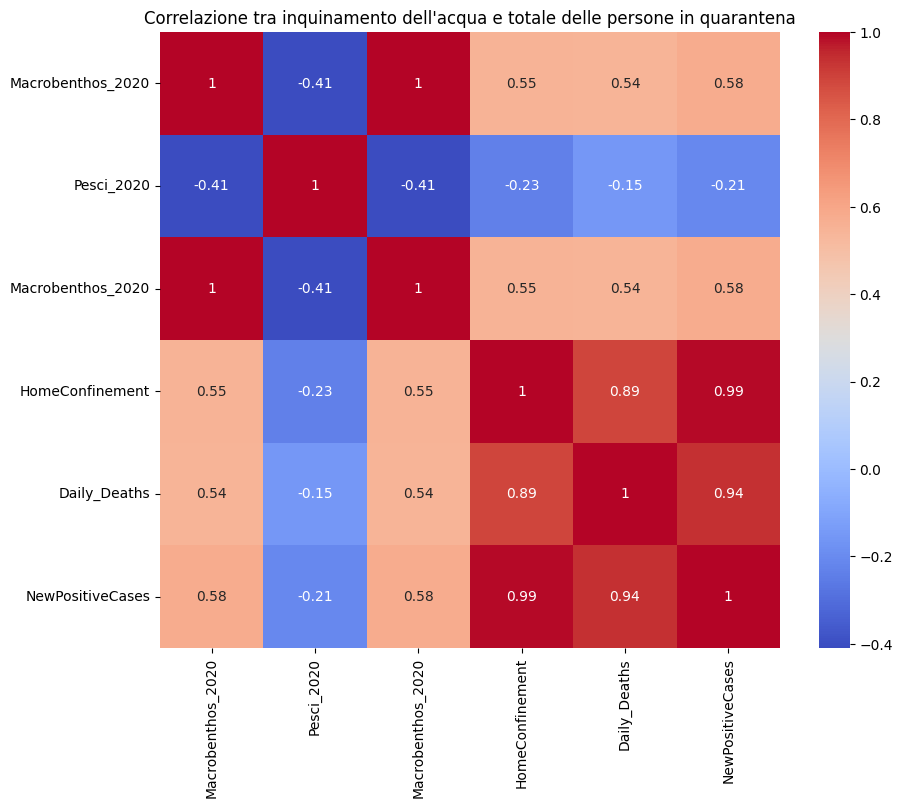

In [ ]:
corr= tab_unite[["Macrobenthos_2020","Pesci_2020","Macrobenthos_2020", "HomeConfinement", "Daily_Deaths", "NewPositiveCases"]].corr()
# poi definisco la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlazione tra inquinamento dell'acqua e totale delle persone in quarantena")
plt.show()

Inversamente proporzionale, significa che maggiore è l'impatto del covid maggiore è l'impatto negativo per la qualità dell'acqua